# Ejercicio de Exploración y Análisis

## Preguntas a resolver y contexto:

Para este caso estamos trabajando con una editorial que desea analizar los datos disponibles para identificar:

1. Principales editoriales para tomar como referencia (segun numero de reseñas)
2. Principales autores publicados por estas editoriales (según numero de reseñas y rating)
3. Principales categorias publicadas por estas editoriales (según numero de reseñas y rating)

Se utiliza el numero de reseñas como referencia ya que este representa, en cierta medida, la interacción que se tiene con el consumidor final (lectores) y el impacto que las publicaciones tienen en él.

Se importan las librerías relevantes:

In [1]:
import pandas as pd
import random
import matplotlib
from IPython.display import Markdown
from global_variables import CSV_BOOK_DATA_CLEANED_PATH, CSV_BOOK_DATA_PATH
from global_variables import CSV_BOOK_RATING_CLEANED_PATH, CSV_BOOK_RATING_PATH

#from data_quality import prepare_book_data


## Limitar importacion de archivos al 100%

Debido al tamaño de los archivos, se selecciona aleatoriamente el 100% de los datos para iniciar el proceso de exploración y análisis.

In [2]:
#100% de los archivos
p = 1
df_books = pd.read_csv("C:/Users/DanielOcampo/Desktop/Trabajo Final/Datasets/books_data.csv", skiprows=lambda i: i>0 and random.random ()>p)
df_rating = pd.read_csv("C:/Users/DanielOcampo/Desktop/Trabajo Final/Datasets/books_rating.csv", skiprows=lambda i: i>0 and random.random ()>p)

In [3]:
print(df_books.shape)
print(df_rating.shape)
df_rating.head()

(212404, 10)
(3000000, 10)


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Revisión inicial y limpieza archivo Books_data.csv

In [4]:
df_books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
#Función Data Quality
def prepare_book_data(df: pd.DataFrame):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Se espera un objeto DataFrame de pandas")
    
    #Eliminar columnas que contienen links
    df_cleaned = pd.DataFrame(df)
    df_cleaned = df_cleaned.fillna('')
    columas_eliminar = ["image", "previewLink", "infoLink","ratingsCount"]
    df_cleaned=df_cleaned.drop(columns=columas_eliminar, axis=1)
    
    #Extaer año, convertir nulls en 0 y cambiar el tipo a integer
    df_cleaned['publishedDate'] = df_cleaned['publishedDate'].str.extract(r'(\d{4})')
    df_cleaned['publishedDate'] = df_cleaned['publishedDate'].fillna('0')
    df_cleaned['publishedDate']=df_cleaned['publishedDate'].astype(int)
    
    #Función para eliminar caracteres innecesarios
    def quitar_corchetes(valor):
        if isinstance(valor, str):
            return valor.strip("[]''")
        elif isinstance(valor, list):
            return [v.strip("''") for v in valor]
        else:
            return valor
            
    #Eliminación de caracteres para authors y categories
    df_cleaned['authors'] = df_cleaned['authors'].apply(quitar_corchetes)
    df_cleaned['categories'] = df_cleaned['categories'].apply(quitar_corchetes)
      
    return df_cleaned

def prepare_book_rating(df: pd.DataFrame):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Se espera un objeto DataFrame de pandas")
     #Eliminar columnas que contienen links
    df_rating_cleaned = pd.DataFrame(df)
    df_rating_cleaned = df_rating_cleaned.fillna('')
    columas_eliminar = ["Price", "review/helpfulness", "review/time","profileName"]
    df_rating_cleaned= df_rating_cleaned.drop(columns=columas_eliminar, axis=1)

    return df_rating_cleaned

In [6]:
df_books_clean = prepare_book_data(df_books)
print(df_books_clean.shape)
df_rating_clean = prepare_book_rating(df_rating)
print(df_rating_clean.shape)

(212404, 6)
(3000000, 6)


In [7]:
df_books_clean.head()

,Title,description,authors,publisher,publishedDate,categories
0,Its Only Art If Its Well Hung!,,Julie Strain,,1996,Comics & Graphic Novels
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R. Ray,,2000,Religion
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,iUniverse,2005,Fiction
4,"Nation Dance: Religion, Identity and Cultural ...",,Edward Long,,2003,


In [8]:
df_rating_clean.head()

,Id,Title,User_id,review/score,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


### Se realiza un merge entre ambas bases de datos limpias para identificar los Reviews (Ratings) correspondientes a cada libro de la base Books_data

- en este caso, no hay un primary Key que nos permita hacer una conexión directa entre las tablas, por lo que deberemos utilizar el titulo (columna 'Title') de referencia para hacer la conexión.
- La tabla Ratings (books_ratings.csv) sera la tabla principal en la conexion y se utilizará books_data para traer los detalles de cada libro reseñado
- Se incluye un segundo proceso de limpieza para asegurarnos de tener la información relevante para el cliente: Reseñas por autor, editorial y/o categorias

In [9]:
df_books_full = df_rating_clean.merge(df_books_clean, on='Title', how='left')
df_books_full.head()


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,,Julie Strain,,1996,Comics & Graphic Novels
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography


In [10]:
#Función Data Quality
def prepare_fullbook_data(df: pd.DataFrame):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Se espera un objeto DataFrame de pandas")
    
    #Eliminar columnas que contienen links
    df_cleaned = pd.DataFrame(df)
    df_cleaned = df_cleaned.fillna('')
    df_cleaned = df_cleaned[
        (df_cleaned['publisher'] != '') |
        (df_cleaned['authors'] != '') |
        (df_books_full['categories'] != '') ]
   
      
    return df_cleaned

In [11]:
df_books_full = prepare_fullbook_data(df_books_full)
df_books_full.shape
df_books_full.head()

,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,,Julie Strain,,1996,Comics & Graphic Novels
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography


## Exploración de base de datos agrupada (df_books_full)

### Conteo de General

In [12]:
Data_count = df_books_full.nunique().reset_index()
Data_count.columns = ['Variable', 'Frequency']
Data_count

,Variable,Frequency
0,Id,195505
1,Title,186727
2,User_id,923802
3,review/score,5
4,review/summary,1441096
5,review/text,1859848
6,description,133047
7,authors,127279
8,publisher,16017
9,publishedDate,326


### Frecuencia Autores

- Se calcula el numero de reseñas por autor. 
- Es necesario filtrar los valores nulos del dataset en esta columna ('Authors')

In [13]:
author_name = ""
filtered_authors = df_books_full[df_books_full['authors'] != author_name]
print(filtered_authors.shape)
filtered_authors.head()

(2609366, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,,Julie Strain,,1996,Comics & Graphic Novels
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography


In [14]:
author_counts = filtered_authors['authors'].value_counts().reset_index()
author_counts.columns = ['Author', 'Frequency']
author_counts.sort_values(by='Frequency', ascending=False)
author_counts.head()

,Author,Frequency
0,J. R. R. Tolkien,37268
1,Jane Austen,36532
2,Charles Dickens,21270
3,John Steinbeck,17027
4,John Ronald Reuel Tolkien,12906


In [15]:
#20 autores con más publicaciones
frecuency_authors = filtered_authors[['authors']].value_counts().head(20)
frecuency_authors

authors                  
J. R. R. Tolkien             37268
Jane Austen                  36532
Charles Dickens              21270
John Steinbeck               17027
John Ronald Reuel Tolkien    12906
Lewis Carroll                12847
Kurt Vonnegut                12124
Harper Lee                   12013
Emily Bronte                 11872
C. S. Lewis                  11824
F. Scott Fitzgerald          10539
Ray Bradbury                 10398
Charlotte Brontë             10352
George Orwell                10200
J. K. Rowling                 9976
William Golding               9463
Aldous Huxley                 9240
Stephen King                  9219
Agatha Christie               9137
Mark Twain                    8384
dtype: int64

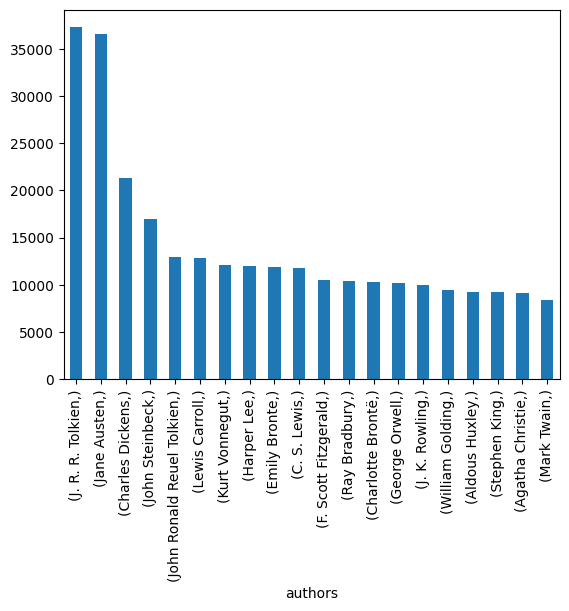

In [16]:
ax = frecuency_authors.plot.bar(column = ['authors'])


In [17]:
Most_review_aut = author_counts.iloc[0,0]
reviews_aut = author_counts.iloc[0,1]
print(F"El autor con mayor numero de reseñas es {Most_review_aut} con {reviews_aut} reseñas")

El autor con mayor numero de reseñas es J. R. R. Tolkien con 37268 reseñas


### Frecuencia Categorias

- Se calcula la frecuencia de reseñas por categoria
- se filtran las categorías nulas

In [18]:
Category_name = ""
filtered_categories = df_books_full[df_books_full['categories'] != Category_name]
print(filtered_categories.shape)
filtered_categories.head()

(2448502, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,,Julie Strain,,1996,Comics & Graphic Novels
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography


In [19]:
Category_counts = filtered_categories['categories'].value_counts().reset_index()
Category_counts.columns = ['Category', 'Frequency']
Category_counts.sort_values(by='Frequency', ascending=False)
Category_counts.head()

,Category,Frequency
0,Fiction,824439
1,Juvenile Fiction,207542
2,Biography & Autobiography,107791
3,Religion,98035
4,History,89988


In [20]:
#20 categorias con más publicaciones
frecuency_category = filtered_categories['categories'].value_counts().head(20)
frecuency_category

Fiction                      824439
Juvenile Fiction             207542
Biography & Autobiography    107791
Religion                      98035
History                       89988
Business & Economics          65618
Computers                     42403
Social Science                31072
Cooking                       29895
Family & Relationships        29277
Juvenile Nonfiction           29248
Self-Help                     29083
Young Adult Fiction           28707
Body, Mind & Spirit           27922
Health & Fitness              25027
Science                       24941
Political Science             22801
Sports & Recreation           22039
Philosophy                    20270
Education                     19047
Name: categories, dtype: int64

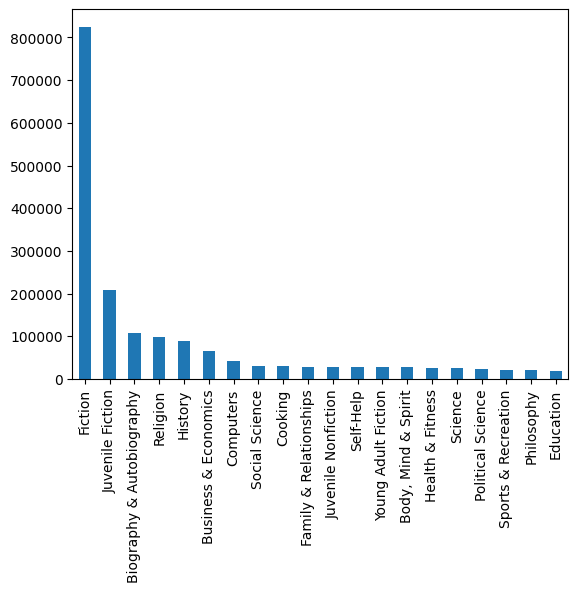

In [21]:
ax = frecuency_category.plot.bar(column = ['categories'])


In [22]:
Most_reviewed_cats = Category_counts.iloc[0,0]
Reviewed_cats = Category_counts.iloc[0,1]
print(F"La categoria con más publicaciones es {Most_reviewed_cats} con {Reviewed_cats} libros")

La categoria con más publicaciones es Fiction con 824439 libros


## Análisis de competencia (Editoriales)

Se hará un analisis más profundo al comportamiento de las reseñas para las 5 editoriales con mayor número de reseñas.

In [23]:
Publisher_name = ""
filtered_publishers = df_books_full[df_books_full['publisher'] != Publisher_name]
print(filtered_publishers.shape)
filtered_publishers.head()

(2217383, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
5,0826414346,Dr. Seuss: American Icon,A2F6NONFUDB6UK,4.0,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography


In [24]:
Publisher_count = filtered_publishers['publisher'].value_counts().reset_index()
Publisher_count.columns = ['Publisher', 'Frequency']
Publisher_count.sort_values(by='Frequency', ascending=False)
Publisher_count.head()

,Publisher,Frequency
0,Penguin,137071
1,Simon and Schuster,118101
2,Harper Collins,84926
3,Random House,46241
4,Vintage,41792


In [25]:
#20 categorias con más publicaciones
frecuency_publisher = filtered_publishers['publisher'].value_counts().head(20)
frecuency_publisher

Penguin                                  137071
Simon and Schuster                       118101
Harper Collins                            84926
Random House                              46241
Vintage                                   41792
Courier Corporation                       37589
HarperCollins                             30218
Mariner Books                             30154
Macmillan                                 29323
Houghton Mifflin Harcourt                 28306
Penguin UK                                26934
Bantam                                    24033
Hachette UK                               23753
John Wiley & Sons                         22531
Ballantine Books                          17990
Library of Alexandria                     16440
Open Road Media                           16321
W. W. Norton & Company                    13510
Anchor                                    12674
Little, Brown Books for Young Readers     12467
Name: publisher, dtype: int64

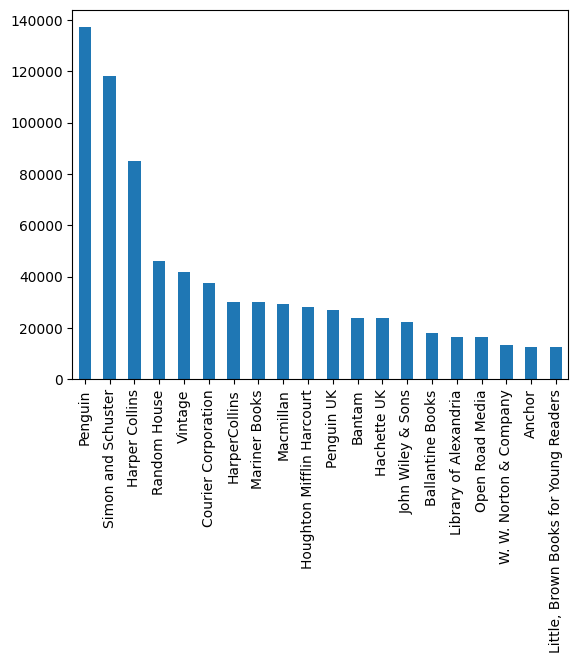

In [26]:
ax = frecuency_publisher.plot.bar(column = ['publisher'])


In [27]:
Top_publisher = Publisher_count.iloc[0,0]
second_top = Publisher_count.iloc[1,0]
third_top = Publisher_count.iloc[2,0]
fourth_top = Publisher_count.iloc[3,0]
fifth_top = Publisher_count.iloc[4,0]
Publish_count = Publisher_count.iloc[0,1]
second_count = Publisher_count.iloc[1,1]
third_count = Publisher_count.iloc[2,1]
fourth_count = Publisher_count.iloc[3,1]
fifth_count = Publisher_count.iloc[4,1]
print(F"""Las editoriales con mayor número de reseñas son '{Top_publisher}' ({Publish_count} reseñas), 
'{second_top}' ({second_count} reseñas), '{third_top}' ({third_count} reseñas), 
'{fourth_top}' ({fourth_count} reseñas) y '{fifth_top}' ({fifth_count} reseñas). 
Estas serán nuestro punto de referencia para el análisis de aquí en adelante.""")

Las editoriales con mayor número de reseñas son 'Penguin' (137071 reseñas), 
'Simon and Schuster' (118101 reseñas), 'Harper Collins' (84926 reseñas), 
'Random House' (46241 reseñas) y 'Vintage' (41792 reseñas). 
Estas serán nuestro punto de referencia para el análisis de aquí en adelante.


In [28]:

top_publishers = df_books_full[
    (df_books_full['publisher'] == Top_publisher) |
    (df_books_full['publisher'] == second_top) |
    (df_books_full['publisher'] == third_top) |
    (df_books_full['publisher'] == fourth_top) |
    (df_books_full['publisher'] == fifth_top) ]
print(top_publishers.shape)
top_publishers.head()

(428131, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
175,1582611440,Ricky Williams: Dreadlocks to Ditka,AF2VPO1D4ZJ0X,5.0,Richardson's book a brilliant look at a myster...,This book combines two of the most sought-afte...,Ricky Williams is not only the best running ba...,Steve Richardson,Simon and Schuster,2012,Sports & Recreation
217,006000486X,Tess and the Highlander,A2VCGJLKGK2WJJ,5.0,My new favorite book from the Avon True Romanc...,Tess was washed ashore on the Isle of May duri...,"In 1543, on a windswept isle off of Scotland, ...",May Mcgoldrick,Harper Collins,2002,Juvenile Fiction
218,006000486X,Tess and the Highlander,,5.0,An awesome novel from May McGoldrick,"After enjoying a previous Avon True Romance, G...","In 1543, on a windswept isle off of Scotland, ...",May Mcgoldrick,Harper Collins,2002,Juvenile Fiction
219,006000486X,Tess and the Highlander,AVWFMN5CELC8Q,4.0,a great book for Historical romance lovers,This is an engaging a count of life of Tess a ...,"In 1543, on a windswept isle off of Scotland, ...",May Mcgoldrick,Harper Collins,2002,Juvenile Fiction
220,006000486X,Tess and the Highlander,A37XYM3KSEIDLS,5.0,Loved it!,This book was a perfect historical romance for...,"In 1543, on a windswept isle off of Scotland, ...",May Mcgoldrick,Harper Collins,2002,Juvenile Fiction


### Author and Category Rating

In [29]:
author_counts = top_publishers['authors'].value_counts().reset_index()
author_counts.columns = ['authors', 'Frequency']
author_counts = author_counts.sort_values(by='Frequency', ascending=False)
author_rating = top_publishers.groupby('authors')['review/score'].mean().reset_index()
author_rating = author_counts.merge(author_rating, on='authors', how='right')
author_rating.columns = ['Author', 'Frequency', 'Average Rating']
author_rating.sort_values(by='Frequency', ascending=False, inplace=True)
author_rating.head()

,Author,Frequency,Average Rating
3175,John Steinbeck,8922,4.260928
824,C. S. Lewis,8378,4.515159
6396,William Golding,7826,3.920010
166,Aldous Huxley,7809,4.248687
2309,Harper Lee,7198,4.549875


In [30]:
category_filter = top_publishers[(top_publishers['categories'] != '')]
category_counts = category_filter['categories'].value_counts().reset_index()
category_rating = category_filter.groupby('categories')['review/score'].mean().reset_index()
category_counts.columns = ['categories', 'Frequency']
category_rating = category_counts.merge(category_rating, on='categories', how='right')
category_rating.columns = ['Category', 'Frequency', 'Rating']
category_rating = category_rating.sort_values(by='Frequency', ascending=False)
category_rating.head()

,Category,Frequency,Rating
131,Fiction,231088,4.119431
166,Juvenile Fiction,35183,4.413126
57,Biography & Autobiography,27777,4.245491
153,History,15558,4.253889
210,Religion,14206,4.361256


### Analisis de Sentimiento en las reseñas de las 5 editoriales seleccionadas

In [31]:
# Sentimiento Comentarios
good_indices = top_publishers["review/score"] > 3.1
good_reviews = top_publishers[good_indices]
bad_indices = top_publishers["review/score"] < 2.1
bad_reviews = top_publishers[bad_indices]

#### Comentarios Positivos

In [32]:
author_counts_good = good_reviews['authors'].value_counts().reset_index()
author_counts_good.columns = ['authors', 'Frequency']
author_counts_good = author_counts_good.sort_values(by='Frequency', ascending=False)
author_rating_good = good_reviews.groupby('authors')['review/score'].mean().reset_index()
author_rating_good = author_counts.merge(author_rating_good, on='authors', how='right')
author_rating_good.columns = ['Author', 'Frequency', 'Average Rating']
author_rating_good.sort_values(by='Frequency', ascending=False, inplace=True)
author_rating_good.head()

,Author,Frequency,Average Rating
3095,John Steinbeck,8922,4.696575
803,C. S. Lewis,8378,4.861911
6222,William Golding,7826,4.644496
163,Aldous Huxley,7809,4.686139
2254,Harper Lee,7198,4.833024


In [33]:
category_filter_good = good_reviews[(good_reviews['categories'] != '')]
category_counts_good = category_filter_good['categories'].value_counts().reset_index()
category_rating_good = category_filter_good.groupby('categories')['review/score'].mean().reset_index()
category_counts_good.columns = ['categories', 'Frequency']
category_rating_good = category_counts_good.merge(category_rating_good, on='categories', how='right')
category_rating_good.columns = ['Category', 'Frequency', 'Rating']
category_rating_good = category_rating_good.sort_values(by='Frequency', ascending=False)
category_rating_good.head()

,Category,Frequency,Rating
127,Fiction,177162,4.717101
159,Juvenile Fiction,30300,4.767327
56,Biography & Autobiography,22435,4.769779
147,History,12633,4.726668
202,Religion,11915,4.828955


#### Comentarios Negativos

In [34]:
author_counts_bad = bad_reviews['authors'].value_counts().reset_index()
author_counts_bad .columns = ['authors', 'Frequency']
author_counts_bad  = author_counts_bad.sort_values(by='Frequency', ascending=False)
author_rating_bad = bad_reviews.groupby('authors')['review/score'].mean().reset_index()
author_rating_bad = author_counts_bad.merge(author_rating_bad, on='authors', how='right')
author_rating_bad.columns = ['Author', 'Frequency', 'Average Rating']
author_rating_bad.sort_values(by='Frequency', ascending=False, inplace=True)
author_rating_bad.head()

,Author,Frequency,Average Rating
3523,Tom Clancy,1559,1.429121
3692,William Golding,1225,1.389388
3041,Robert M. Pirsig,798,1.383459
3313,Stephen King,797,1.529486
520,Catherine Coulter,767,1.295958


In [35]:
category_filter_bad = bad_reviews[(bad_reviews['categories'] != '')]
category_counts_bad = category_filter_bad['categories'].value_counts().reset_index()
category_rating_bad = category_filter_bad.groupby('categories')['review/score'].mean().reset_index()
category_counts_bad.columns = ['categories', 'Frequency']
category_rating_bad = category_counts_bad.merge(category_rating_bad, on='categories', how='right')
category_rating_bad.columns = ['Category', 'Frequency', 'Rating']
category_rating_bad = category_rating_bad.sort_values(by='Frequency', ascending=False)
category_rating_bad.head()

,Category,Frequency,Rating
73,Fiction,29946,1.479997
33,Biography & Autobiography,3164,1.385272
94,Juvenile Fiction,2478,1.453592
36,Business & Economics,1833,1.345336
120,Religion,1511,1.375910


## Conclusiones

In [36]:
#Variables de conclusion
#Editoriales
Top_publisher = Publisher_count.iloc[0,0]
second_top = Publisher_count.iloc[1,0]
third_top = Publisher_count.iloc[2,0]
fourth_top = Publisher_count.iloc[3,0]
fifth_top = Publisher_count.iloc[4,0]
Publish_count = Publisher_count.iloc[0,1]
second_count = Publisher_count.iloc[1,1]
third_count = Publisher_count.iloc[2,1]
fourth_count = Publisher_count.iloc[3,1]
fifth_count = Publisher_count.iloc[4,1]

#Autores

first_author = author_rating.iloc[0,0]
second_author = author_rating.iloc[1,0]
third_author = author_rating.iloc[2,0]
fourth_author = author_rating.iloc[3,0]
fifth_author = author_rating.iloc[4,0]
review_count1 = author_rating.iloc[0,1]
review_count2 = author_rating.iloc[1,1]
review_count3 = author_rating.iloc[2,1]
review_count4 = author_rating.iloc[3,1]
review_count5 = author_rating.iloc[4,1]
review_rating1 = author_rating.iloc[0,2]
review_rating2 = author_rating.iloc[1,2]
review_rating3 = author_rating.iloc[2,2]
review_rating4 = author_rating.iloc[3,2]
review_rating5 = author_rating.iloc[4,2]

#Categorias

category1 = category_rating.iloc[0,0]
category2 = category_rating.iloc[1,0]
category3 = category_rating.iloc[2,0]
category4 = category_rating.iloc[3,0]
category5 = category_rating.iloc[4,0]
review_count_cat1 = category_rating.iloc[0,1]
review_count_cat2 = category_rating.iloc[1,1]
review_count_cat3 = category_rating.iloc[2,1]
review_count_cat4 = category_rating.iloc[3,1]
review_count_cat5 = category_rating.iloc[4,1]
review_rating_cat1 = category_rating.iloc[0,2]
review_rating_cat2 = category_rating.iloc[1,2]
review_rating_cat3 = category_rating.iloc[2,2]
review_rating_cat4 = category_rating.iloc[3,2]
review_rating_cat5 = category_rating.iloc[4,2]

In [37]:
markdown_text = F"""
### Principales editoriales a analizar

Las editoriales con mayor número de reseñas son 
1. '{Top_publisher}':   {Publish_count} reseñas
2. '{second_top}':      {second_count} reseñas
3. '{third_top}':       {third_count} reseñas 
4. '{fourth_top}':      {fourth_count} reseñas
5. '{fifth_top}':       {fifth_count} reseñas. 

Con base a este resultado, se filtraron todas las reseñas relacionadas a estas 5 editoriales para encontrar:

1. los 5 autores que más reseñas traen a estas editoriales, junto con el Rating promedio por autor
2. las 5 categorias más reseñadas y su rating promedio

### Principales autores

En cuanto a los principales autores publicados por estas editoriales, los 5 que más reseñas traen son:
1. '{first_author}':   {review_count1} reseñas con un promedio de {round(review_rating1,2)} estrellas
2. '{second_author}':  {review_count2} reseñas con un promedio de {round(review_rating2,2)} estrellas
3. '{third_author}':   {review_count3} reseñas con un promedio de {round(review_rating3,2)} estrellas
4. '{fourth_author}':  {review_count4} reseñas con un promedio de {round(review_rating4,2)} estrellas
5. '{fifth_author}':   {review_count5} reseñas con un promedio de {round(review_rating5,2)} estrellas

### Principales Categorias

En cuanto a los principales autores publicados por estas editoriales, los 5 que más reseñas traen son:
1. '{category1}':   {review_count_cat1} reseñas con un promedio de {round(review_rating_cat1,2)} estrellas
2. '{category2}':   {review_count_cat2} reseñas con un promedio de {round(review_rating_cat2,2)} estrellas
3. '{category3}':   {review_count_cat3} reseñas con un promedio de {round(review_rating_cat3,2)} estrellas
4. '{category4}':   {review_count_cat4} reseñas con un promedio de {round(review_rating_cat4,2)} estrellas
5. '{category5}':   {review_count_cat5} reseñas con un promedio de {round(review_rating_cat5,2)} estrellas

"""

display(Markdown(markdown_text))


### Principales editoriales a analizar

Las editoriales con mayor número de reseñas son 
1. 'Penguin':   137071 reseñas
2. 'Simon and Schuster':      118101 reseñas
3. 'Harper Collins':       84926 reseñas 
4. 'Random House':      46241 reseñas
5. 'Vintage':       41792 reseñas. 

Con base a este resultado, se filtraron todas las reseñas relacionadas a estas 5 editoriales para encontrar:

1. los 5 autores que más reseñas traen a estas editoriales, junto con el Rating promedio por autor
2. las 5 categorias más reseñadas y su rating promedio

### Principales autores

En cuanto a los principales autores publicados por estas editoriales, los 5 que más reseñas traen son:
1. 'John Steinbeck':   8922 reseñas con un promedio de 4.26 estrellas
2. 'C. S. Lewis':  8378 reseñas con un promedio de 4.52 estrellas
3. 'William Golding':   7826 reseñas con un promedio de 3.92 estrellas
4. 'Aldous Huxley':  7809 reseñas con un promedio de 4.25 estrellas
5. 'Harper Lee':   7198 reseñas con un promedio de 4.55 estrellas

### Principales Categorias

En cuanto a los principales autores publicados por estas editoriales, los 5 que más reseñas traen son:
1. 'Fiction':   231088 reseñas con un promedio de 4.12 estrellas
2. 'Juvenile Fiction':   35183 reseñas con un promedio de 4.41 estrellas
3. 'Biography & Autobiography':   27777 reseñas con un promedio de 4.25 estrellas
4. 'History':   15558 reseñas con un promedio de 4.25 estrellas
5. 'Religion':   14206 reseñas con un promedio de 4.36 estrellas

